# Visualization
Unit 1 / Lesson 3

Creating clear, clean, easy-to-understand visuals is a critical skill in all stages of the data science process. Visualizations helps us explore new data sets, check model results against our data, and visuals are a key part of an effective presentation to stakeholders.

Data cleaning is closely intertwined with data visualization. Good visuals help us intentify problems that will interfere with our results. We'll review different types of problems you may encounter and some methods of dealing with them.

By the end of this lesson you will be able to:
- plot data using seaborn
- choose the right type of visualization to fit your goals
- diagnose 'dirt' in a dataset using research, logic, and visualization
- carry out basic imputation

In [1]:
# import all necessary packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

### Plotting Basics

In the foundamentals course we introduced plotting with matplotlib and Pandas to create basic line plots, scatter plots, histograms, box plots, and bar chats. Here's a brief review of the basics:

- Plots should be clean and simple. Only include as much information as needed to make your point and no more.
- Plots should be informatively labelled, with titles and axes in language the reader can understand. It shouldn't be necessary to read your code to understand what's being presented.
- Basic plots show every datapoint. Statistical plotting aggregates information to highlight features of data.
- Let your choice of plot be guided by the data.

  index      col1      col2
0    g1  0.169477  0.664960
1    g2  0.522803  0.834764
2    g1  2.001512 -0.215303
3    g2 -0.046579  0.992121
4    g1 -0.979298  1.081111
5    g2 -0.452379 -0.483353
Line plots show data over time


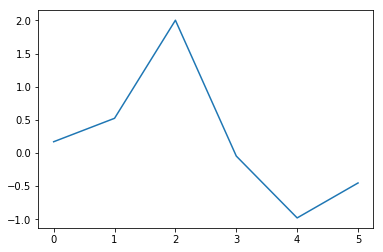

Scatter plots show the relationship between two variables


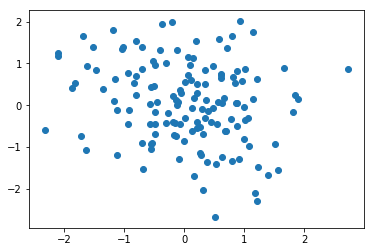

Histograms show the distribution of a dataset and any outliers


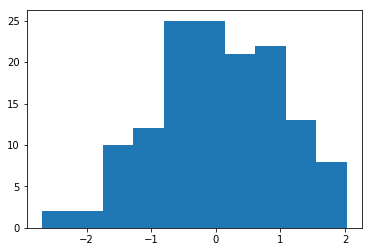

QQ plots show how closely a variable is to a known distribution (such as a normal distribution)


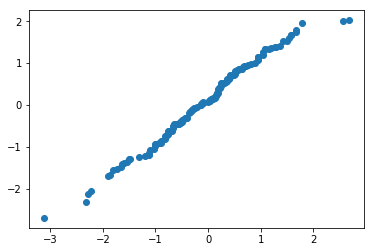

Boxplots are used to compare groups and to identify difference in variance, as well as any outliers


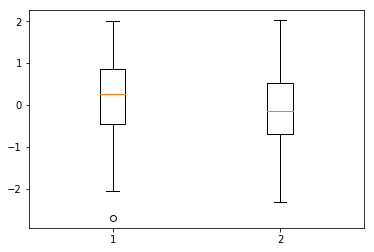

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

foods = pd.DataFrame(np.random.randn(140,2), columns=['col1','col2'], index=['g1','g2']*70).reset_index()
print(foods.iloc[0:6,:].head(20))

print('Line plots show data over time')
plt.plot(foods.iloc[0:6]['col1'])
plt.show()

print('Scatter plots show the relationship between two variables')
plt.scatter(foods['col2'], foods['col1'])
plt.show()

print('Histograms show the distribution of a dataset and any outliers')
plt.hist(foods['col1'])
plt.show()

print('QQ plots show how closely a variable is to a known distribution (such as a normal distribution)')
norm = np.random.normal(0,1,140)
norm.sort()
plt.plot(norm, foods['col1'].sort_values(), 'o')
plt.show()

print('Boxplots are used to compare groups and to identify difference in variance, as well as any outliers')
plt.boxplot([foods[foods['index']=='g1']['col1'], foods[foods['index']=='g2']['col1']])
plt.show()

### Formatting with Seaborn

Let's compare three attempts to plot data and determine which is the easiest to understand. The data is an example dataset provided by Seaborn that contains information on tips received by restaurant staff from men and women during lunch and dinner. The goal is to determine which gender tips more and at what mealtime.

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
   total_bill   tip     sex smoker  day    time  size  tips_percent
0       16.99  1.01  Female     No  Sun  Dinner     2      5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3     16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3     16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2     13.978041


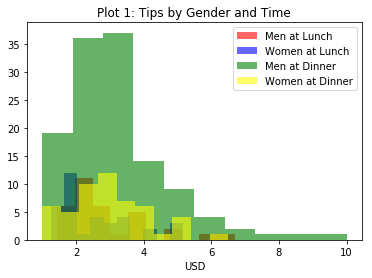

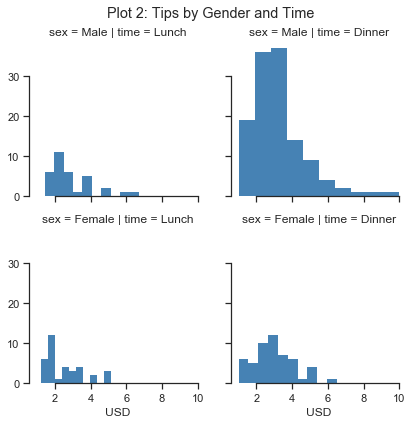

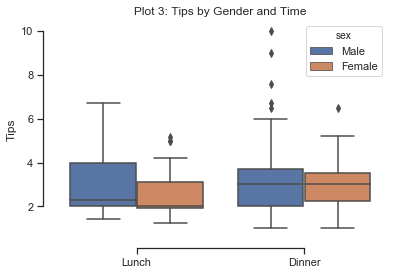

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Loading an example dataset provided by the seaborn package.
tips = sns.load_dataset('tips')
print(tips.head(4))

# Add column 'percent' with lambda function
tips = tips.assign(tips_percent = lambda x: (tips.tip / tips.total_bill) * 100)
print(tips.head(4))

# Creating variables for each of the four conditions to graph using the basic
# matplotlib functionality.
menlunchtip = tips.loc[(tips['sex']=='Male')&(tips['time']=='Lunch'),'tip']
womenlunchtip = tips.loc[(tips['sex']!='Male')&(tips['time']=='Lunch'),'tip']
mendinnertip = tips.loc[(tips['sex']=='Male')&(tips['time']=='Dinner'),'tip']
womendinnertip = tips.loc[(tips['sex']!='Male')&(tips['time']=='Dinner'),'tip']

# Making overlapping histograms.
plt.hist(menlunchtip, color='red', alpha=0.6, label='Men at Lunch')
plt.hist(womenlunchtip, color='blue', alpha=0.6, label='Women at Lunch')
plt.hist(mendinnertip, color='green', alpha=0.6, label='Men at Dinner')
plt.hist(womendinnertip, color='yellow', alpha=0.6, label='Women at Dinner')
plt.xlabel('USD')
plt.legend(loc='upper right')
plt.title('Plot 1: Tips by Gender and Time')
plt.show()

# Showing the  information in a seaborn facet grid.
sns.set(style='ticks') # sets the overall aethetic

# Tell seaborn about the structure of our data.
g = sns.FacetGrid(tips, row='sex', col='time')
# Name the plot type and the variable to be plotted using the structure.
g.map(plt.hist, 'tip', color='steelblue', lw=0)
# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=0.9)
# Making a more informative axis name.
g.set_axis_labels('USD')
plt.suptitle('Plot 2: Tips by Gender and Time')
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()

# Comparing groups using boxplots.
ax = sns.boxplot(x='time', y='tip', hue='sex', data=tips)
plt.title('Plot 3: Tips by Gender and Time')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Tips')

plt.show()

Plot 1 isn't very helpful, the bars overlap so much we can't see what's happening across all the groups. All we can determine is men at dinner tip the most.

Plot 2 is better, it seperates the groups into subplots so we can compare the data. All the subplots are scaled so they have the same x and y-axis range. Though this plot can be improved even more.

Plot 3 contains all the information we need and displays it in a manner easiest to read. We can see that on average women tip less then men, but follow a similar pattern of tipping more at dinner.

We can plot the same data to emphasize differences in mealtime:

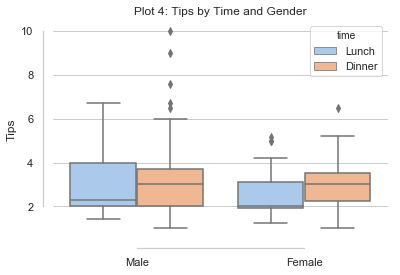

In [4]:
#Comparing groups again, but with a different emphasis.

# Setting the overall aesthetic.
sns.set(style='whitegrid')

ax = sns.boxplot(x='sex', y='tip', hue='time', data=tips, palette='pastel')

plt.title('Plot 4: Tips by Time and Gender')

sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Tips')

plt.show()

In plot 4 it's obvious that dinner generates higher tips than lunch and that this is true for both men and women. But it's harder to see who tips more, men vs. women.

Plots 3 and 4 are equally good but emphasize different things. Let your questions guide which plot you choose.

### Thinking Like a Data Scientist

As a general rule of thumb, if a plot requires a lot of thought to understand, it's probably a bad plot. When you're nose-deep in data every plot you make will be easy to understand. Make sure that your plots are just as easy to understand without the context of the data.

### Seaborn

Seaborn is built ontop of matplotlib and is a more powerful, flexible tool with nicer default options.

This example gallery will give you a sense of what seaborn can do:
http://seaborn.pydata.org/examples/

Here are some other ways we can use seaborn to visual the same data we were working with above:

Bar Plot
The most commonly used method to visualize grouped data, bar plots (sometimes called 'dynamite plots') often show the mean and sometimes show some measure of variance with an error bar. Bar plots can also be used for counting.

Here we're going to plot the Tips data with a 95% confidence interval:

C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * 

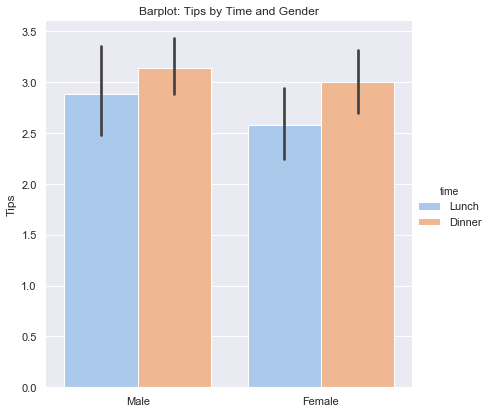

In [5]:
# set the aesthetic
sns.set(style='darkgrid')

g = sns.factorplot(x='sex', y='tip', hue='time', data=tips, size=6, kind='bar', palette='pastel', ci=95)
g.despine(left=True)
g.set(xlabel='', ylabel='Tips')
plt.title('Barplot: Tips by Time and Gender')
plt.show()

Barplots are common but people object to them for their tendancy of oversimplify results and inefficiency at presenting data. In our example, the space between 0 and 2.0 is wasted; yet the height of the bars is what conveys the size, so the plot _has_ to start at 0. Barplots can also be misleading, the brain looks at the difference between the groups relative to the total height of the bars. That means a difference of two points will look more dramatic on bars with a height of 4 vs. a height of 20. The differences in groups should be evaluated on the size of the error bars, not the height of the bars themselves.

Here are some examples of bar barplots in real life:
https://www.washingtonpost.com/graphics/politics/2016-election/trump-charts/?noredirect=on


### Pointplot

Pointplots have all the strengths of barplots without many of the weaknesses. Pointplots use much less space and the difference in size between the two groups is comparative to the size of the error bars.

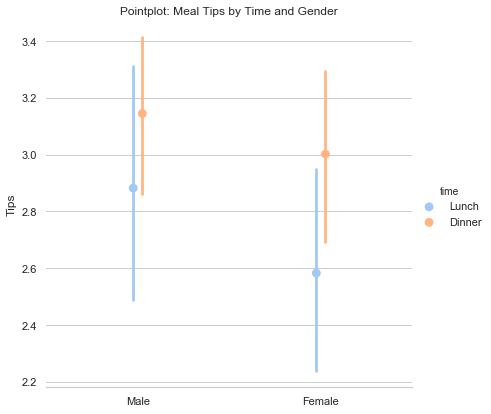

In [6]:
# set the aesthetic
sns.set(style='whitegrid')

g = sns.factorplot(x="sex", y="tip", hue="time", data=tips,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)

g.despine(left=True)
g.set(xlabel='', ylabel='Tips')
plt.title('Pointplot: Meal Tips by Time and Gender')
plt.show()

### Visualizing Two Continuous Variables

So far we've only visualized one continuous variable, tips, and two categorical variables, gender and time. Visualizing two continuous variables together requires different types of plots.


### Scatter Plot

Scatter plots are the bread and butter of data scientists. They may appear with or without a best-fit line to show the relationship between the variables.

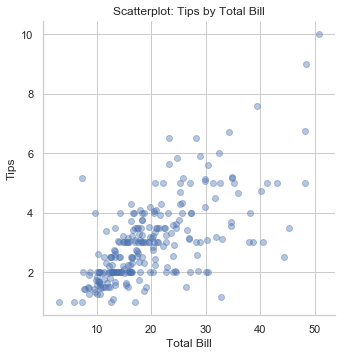

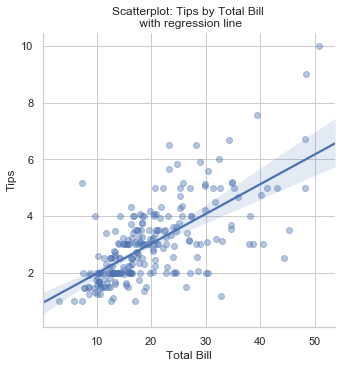

In [9]:
g = sns.lmplot(y='tip', # variable 1
              x='total_bill', # variable 2
              data=tips, # data
              fit_reg=False, # if set to True, plots regression line.
              scatter_kws={'alpha':0.4} # additional keyword arguments to pass plt.scatter or plt.plot
              )
g.set(xlabel='Total Bill', ylabel='Tips', title='Scatterplot: Tips by Total Bill')
plt.show()

g = sns.lmplot(y='tip',
              x='total_bill',
              data=tips,
              fit_reg=True, # the regression line includes a 95% confidence envelope
              scatter_kws={'alpha':0.4})
Title='Scatterplot: Tips by Total Bill \n with regression line'
g.set(xlabel='Total Bill', ylabel='Tips', title=Title)
plt.show()

We can also split the data plots by group, in this case gender:

C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


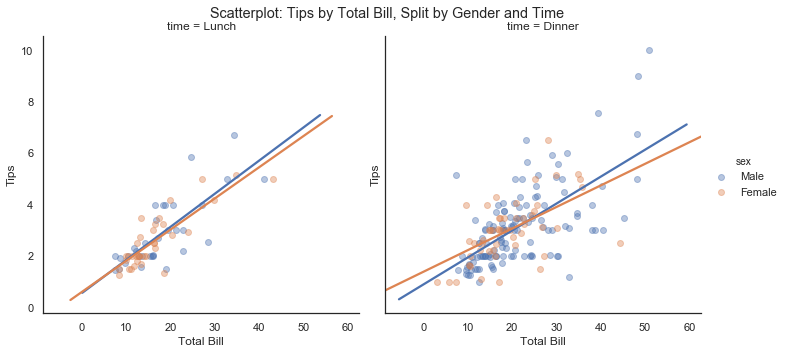

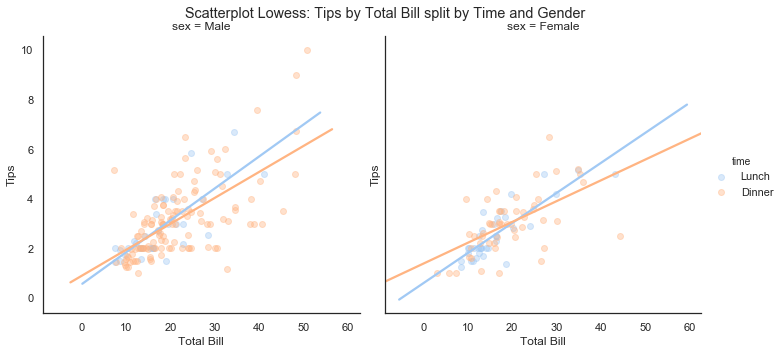

In [18]:
#import statsmodels as sm

# set the aethestic
sns.set(style='white')

g = sns.lmplot(y='tip',
              x='total_bill',
              hue='sex', # what is this?
              data=tips,
              col='time', # what is this?
              fit_reg=True,
              ci=False, # what is this?
              scatter_kws={'alpha':0.4})
Title = 'Scatterplot: Tips by Total Bill, Split by Gender and Time'
g.set(xlabel='Total Bill', ylabel='Tips')
plt.suptitle(Title) # why?
plt.subplots_adjust(top=0.9) # why?
plt.show()

g = sns.lmplot(y='tip', 
               x='total_bill',
               hue='time',
               data=tips, # Data.
               col='sex',
               fit_reg=True, 
               ci=False,
               scatter_kws={'alpha':0.4}, 
               palette='pastel')
               #lowess=True) # Using local weighing to fit a line.
g.set(xlabel='Total Bill', ylabel='Tips')
Title_lowess = 'Scatterplot Lowess: Tips by Total Bill split by Time and Gender'
plt.suptitle(Title_lowess)
plt.subplots_adjust(top=0.9)
plt.show()

There are many types of plots and an almost infinite number of ways to combine them:

https://flowingdata.com/2017/01/24/one-dataset-visualized-25-ways/


__Seaborn__ is a powerful, flexible tool that should meet most of your plotting needs.


More complex visualizations are a specialization in data science:

https://flowingdata.com/2016/12/29/best-data-visualization-projects-of-2016/